In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import math

#Import DecisionTree as a classifier
from sklearn.ensemble import GradientBoostingClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

import ROOT

#from IPython.display import display, Math

In [57]:
path = ''
file = 'RecoilsData_PMT.csv'
#file = 'RecoilsData_PMT_moreVar.csv'
df = pd.read_csv(path + file)
df.head()
print(df.shape)
#drop events with no recoils at all
df = df[df['ar40recoils'] != 0]

#vars_to_drop = ['neckVetoN', 'subeventN', 'nhit_5000']

#drop irrelevant variables
#df = df.drop(vars_to_drop, axis=1)
df.head()
print(df.shape)
#drop rows with the value -99999, these are outliers
df = df.drop(index=df[df.eq(-99999).any(axis=1)].index)

df.head()
print(df.shape)

(11162, 25)
(11162, 25)
(9641, 25)


In [58]:
#drop the variable used to make the flags for multiple recoils
df = df.drop(['ar40recoils'], axis=1) 
print(df.shape)

(9641, 24)


In [59]:
# Count the occurrences of each value in multiplerecoils
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)
# Drop rows with multiplerecoils to make it more even between multiple and single
#df = df.drop(df[df['multiplerecoils'] == 1].head(659).index) #50-50
#df = df.drop(df[df['multiplerecoils'] == 1].head(300).index) #2-1
# Count the occurrences of each value in multiplerecoils again
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

multiplerecoils
1    7754
0    1887
Name: count, dtype: int64
multiplerecoils
1    7754
0    1887
Name: count, dtype: int64


In [60]:
# Get a random permutation of the DataFrame's index
random_order = np.random.RandomState(seed=9).permutation(df.index)

# Reorder the DataFrame randomly using the random permutation
df = df.loc[random_order]

In [61]:
#dependent variable that will be predicted
var = 'multiplerecoils'

X = df.drop([var], axis=1)

# Select the dependent variable
y = df[var] 

print(X.shape)
print(y.shape)

(9641, 23)
(9641,)


In [62]:
# Create the GradientBoostingClassifier (Boosted Decision Tree)
boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

print("Created Boosted Decision Tree Classifier")

Created Boosted Decision Tree Classifier


In [63]:
# Perform cross-validation with 10 folds
# 'cv' parameter specifies the number of folds
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy')

#aprox runtime: 1 minute

cross_val_scores = cross_val_score(boosted_tree, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_score = cross_val_scores.mean()
print(f"\nAverage Score: {average_score:.2f}")

Cross-Validation Scores:
Fold 1: 0.83
Fold 2: 0.82
Fold 3: 0.82
Fold 4: 0.84
Fold 5: 0.83
Fold 6: 0.82
Fold 7: 0.84
Fold 8: 0.83
Fold 9: 0.82
Fold 10: 0.83

Average Score: 0.83


In [64]:
#optional
#additional cross validation scores
'''
scores = cross_validate(boosted_tree, X, y, cv=10, scoring='accuracy',return_train_score=True)

# Print the cross-validation scores for each fold
print("Cross-Validate Test Scores:")
for fold, score in enumerate(scores['test_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['test_score'].mean()
print(f"\nAverage Test Score: {average_scoreval:.2f}")

# Print the cross-validation train scores for each fold
print("\nCross-Validate Train Scores:")
for fold, score in enumerate(scores['train_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['train_score'].mean()
print(f"\nAverage Train Score: {average_scoreval:.2f}")

# Print the cross-validation fit times for each fold
print("\nFit Times (s):")
for fold, fit_time in enumerate(scores['fit_time'], start=1):
    print(f"Fold {fold}: {fit_time:.2f}")

# Calculate and print the average fit time
average_fittime = scores['fit_time'].mean()
print(f"\nAverage fit time: {average_fittime:.2f}")

# Print the cross-validation score times for each fold
print("\nScore Times (s):")
for fold, score_time in enumerate(scores['score_time'], start=1):
    print(f"Fold {fold}: {score_time:.2f}")

# Calculate and print the average score time
average_scoretime = scores['score_time'].mean()
print(f"\nAverage score time: {average_scoretime:.2f}")
'''

'\nscores = cross_validate(boosted_tree, X, y, cv=10, scoring=\'accuracy\',return_train_score=True)\n\n# Print the cross-validation scores for each fold\nprint("Cross-Validate Test Scores:")\nfor fold, score in enumerate(scores[\'test_score\'], start=1):\n    print(f"Fold {fold}: {score:.2f}")\n\n# Calculate and print the average cross-validation score\naverage_scoreval = scores[\'test_score\'].mean()\nprint(f"\nAverage Test Score: {average_scoreval:.2f}")\n\n# Print the cross-validation train scores for each fold\nprint("\nCross-Validate Train Scores:")\nfor fold, score in enumerate(scores[\'train_score\'], start=1):\n    print(f"Fold {fold}: {score:.2f}")\n\n# Calculate and print the average cross-validation score\naverage_scoreval = scores[\'train_score\'].mean()\nprint(f"\nAverage Train Score: {average_scoreval:.2f}")\n\n# Print the cross-validation fit times for each fold\nprint("\nFit Times (s):")\nfor fold, fit_time in enumerate(scores[\'fit_time\'], start=1):\n    print(f"Fold 

In [65]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7712, 23)
(7712,)
(1929, 23)
(1929,)


In [66]:
#Train DT
boosted_tree.fit(X_train, y_train)
print("Training set score: %f" % boosted_tree.score(X_train, y_train))
print("Test set score: %f" % boosted_tree.score(X_test, y_test))

Training set score: 0.866961
Test set score: 0.821669


In [67]:
#lower: the minimum amount of 1s, upper: the maximum amount of 1s. 
#for lower: subtract uncertainty from column of 1s and add to columns of 0s,
#for upper: subtract uncertainty from column of 0s and add to column of 1s
#then do argmax for each to obtain upper and lower predictions

staged_probs = boosted_tree.staged_predict_proba(X_test)

# Calculate the uncertainty as the standard deviation of the staged probabilities
uncertainty = np.std(list(staged_probs), axis=0)

pred_prob = boosted_tree.predict_proba(X_test)

pred_prob_lower = np.empty_like(pred_prob)
pred_prob_upper = np.empty_like(pred_prob)

# lower limit on predictions of 1s
for i in range(pred_prob.shape[0]):
    # Add uncertainty to the column of 0s 
    pred_prob_lower[i, 0] = pred_prob[i, 0] + uncertainty[i][1]
    
    # Subtract uncertainty from the column of 1s 
    pred_prob_lower[i, 1] = pred_prob[i, 1] - uncertainty[i][1]

#upper limit on prediction of 1s    
for i in range(pred_prob.shape[0]):
    # Subtract uncertainty from the column of 0s 
    pred_prob_upper[i, 0] = pred_prob[i, 0] - uncertainty[i][1]
    
    # Add uncertainty to the column of 1s 
    pred_prob_upper[i, 1] = pred_prob[i, 1] + uncertainty[i][1]    

# Get the final predictions by considering the class with the highest probability
y_pred = np.argmax(pred_prob, axis=1)
y_pred_lower = np.argmax(pred_prob_lower, axis=1)
y_pred_upper = np.argmax(pred_prob_upper, axis=1)
    
count = np.count_nonzero(y_pred == 1)
count_lower = np.count_nonzero(y_pred_lower == 1)
count_upper = np.count_nonzero(y_pred_upper == 1)

countz = np.count_nonzero(y_pred == 0)
count_lowerz = np.count_nonzero(y_pred_lower == 0)
count_upperz = np.count_nonzero(y_pred_upper == 0)

print("Number of predictions of 1s:", count, )
print("Lower limit on predictions of 1s:", count_lower)
print("Upper limit on predictions of 1s:", count_upper)

#inverted order for prediction of 0s
print("Number of predictions of 0s:", countz)
print("Lower limit on predictions of 0s:", count_upperz)
print("Upper limit on predictions of 0s:", count_lowerz)
    
print("Total predictions:", count + countz)
print("Total predictions (lower):", count_lower + count_lowerz)
print("Total predictions (upper):", count_upper + count_upperz) 

# Make predictions on the test set
y_pred_conf = boosted_tree.predict(X_test)

#confirmation that both methods of prediction give the same result
are_equal = np.array_equal(y_pred, y_pred_conf)
print('Are both methods of prediction equal?',are_equal)

Number of predictions of 1s: 1742
Lower limit on predictions of 1s: 1679
Upper limit on predictions of 1s: 1809
Number of predictions of 0s: 187
Lower limit on predictions of 0s: 120
Upper limit on predictions of 0s: 250
Total predictions: 1929
Total predictions (lower): 1929
Total predictions (upper): 1929
Are both methods of prediction equal? True


In [68]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.82167


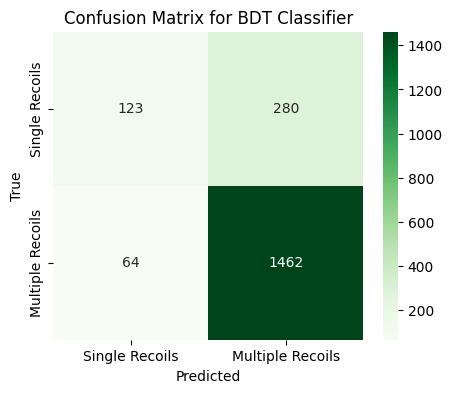

In [69]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
# Create a mapping dictionary to replace 0 with 'single' and 1 with 'multiple'
#label_mapping = {0: 'single recoils', 1: 'multiple recoils'}

# Replace the labels using the mapping dictionary
#df[var] = df[var].replace(label_mapping)

#class_labels = df[var].unique()
#class_labels = ['single recoils', 'multiple recoils'] #negative, positive

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')

# Add a legend
tick_marks = np.arange(len(df[var].unique())) + 0.5
plt.xticks(tick_marks, ['Single Recoils', 'Multiple Recoils'])
plt.yticks(tick_marks, ['Single Recoils', 'Multiple Recoils'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BDT Classifier')

# Display the plot
plt.show()

In [70]:
#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred)#, average='binary')
#The recall is intuitively the ability of the classifier to find all the positive samples.
pres = precision_score(y_test, y_pred)#, average='binary')
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
F1_score = 2/((1/rec) + (1/pres))
#F1 is the harmmonic mean between recall and precision

#weighted metrics
wrec = recall_score(y_test, y_pred, average='weighted')
wpres = precision_score(y_test, y_pred, average='weighted')
wF1_score = 2/((1/wrec) + (1/wpres))

print("The recall is: ", rec)
print("The precision is: ", pres)
print("The F1-score is: ", F1_score)

print("\nThe weighted recall is: ", wrec)
print("The weighted precision is: ", wpres)
print("The weighted F1-score is: ", wF1_score)

The recall is:  0.9580602883355177
The precision is:  0.8392652123995408
The F1-score is:  0.8947368421052632

The weighted recall is:  0.8216692586832556
The weighted precision is:  0.8013445207008084
The weighted F1-score is:  0.8113796279955194


In [71]:
#metrics by hand

tn, fp, fn, tp = cm.ravel()

err = (fp + fn)/(fp + fn + tn + tp)
acc = (tp + tn)/(fp + fn + tn + tp)
re = tp/(tp + fn)
sp = tn/(tn + fp)
prec = tp/(tp + fp)
fpr = fp/(tn + fp)
mcc = ((tp*tn) - (fp*fn))/math.sqrt((tp + fp)*(tp + tn)*(tn + fp)*(tn + fn))
F1 = 2/((1/re) + (1/prec))

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nError rate:", err)
print("Accuracy:", acc)
print("Recall:", re) #sensitivity, true positive rate
print("Specificity:", sp) #true negative rate
print("Precision:", prec) #positive predictive value
print("False positive rate:", fpr)
print("Mathews correlation coefficient:", mcc)
print("F1 score:", F1)

True Negative: 123
False Positive: 280
False Negative: 64
True Positive: 1462

Error rate: 0.17833074131674442
Accuracy: 0.8216692586832556
Recall: 0.9580602883355177
Specificity: 0.3052109181141439
Precision: 0.8392652123995408
False positive rate: 0.6947890818858561
Mathews correlation coefficient: 0.35493670102753166
F1 score: 0.8947368421052632


In [73]:
# Get the feature importances
importance = boosted_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Sum all the importance values
total_importance = feature_importances_df.sum()
print("")
print(f"Total Importance: {total_importance['Importance']}")

print(X.columns)

                   Feature  Importance
14          rprompt60Bayes    0.231308
1                  fprompt    0.192288
18           mblikelihoodR    0.150281
0                      qPE    0.122660
13                nSCBayes    0.100650
3                eventTime    0.039419
17           mblikelihoodZ    0.034433
5                   fmaxpe    0.031750
7            chargetopring    0.016385
19               timefit2X    0.015442
9         chargebottomring    0.012244
15           mblikelihoodX    0.012041
10  chargesecondbottomring    0.010645
16           mblikelihoodY    0.009417
20               timefit2Y    0.005550
22                  deltat    0.004898
8         chargesecondring    0.004621
21               timefit2Z    0.002189
11   chargethirdbottomring    0.001632
12      pulseindexfirstgar    0.001589
4           numEarlyPulses    0.000561
6                neckVetoN    0.000000
2                subeventN    0.000000

Total Importance: 0.9999999999999998
Index(['qPE', 'fprompt', '

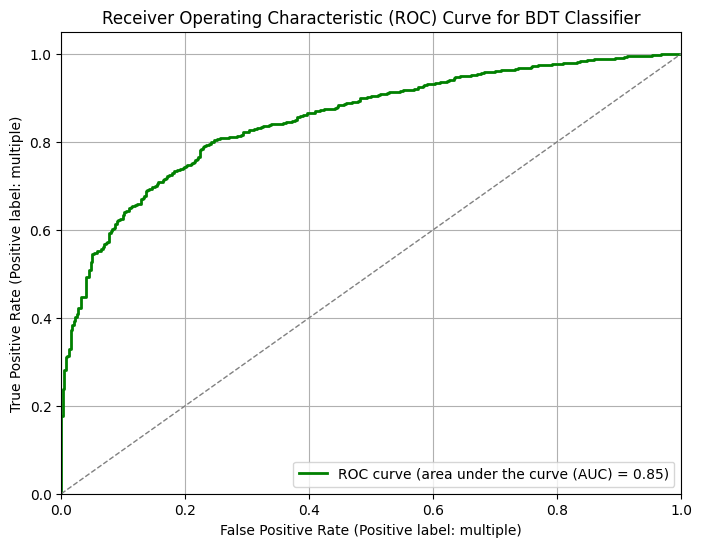

In [74]:
# Get predicted probabilities for the positive class (1) on the test set
y_prob = boosted_tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
roc_auc = auc(fpr, tpr) #auc remains the same

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label='ROC curve (area under the curve (AUC) = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Positive label: multiple)')
plt.ylabel('True Positive Rate (Positive label: multiple)')
plt.title('Receiver Operating Characteristic (ROC) Curve for BDT Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [75]:
#pip install root-numpy #issue with root version ImportError: dynamic module does not define module export function (PyInit_libPyROOT)
#save predicted multiple recoils to a .root file

# Convert y_pred to a DataFrame with a column name
y2_pred = pd.DataFrame(data = y_pred, index=X_test.index, columns = [var])

prediction = pd.concat([X_test, y2_pred], axis=1)

#keep only multiple recoils and drop that column
prediction = prediction[prediction[var] == 1]
prediction = prediction.drop([var], axis=1)

#reset the indexes of prediction
prediction.reset_index(drop=True, inplace=True)

print(prediction.head())
#save to csv
#prediction.to_csv('prediction.csv', index=False)

         qPE   fprompt  subeventN  eventTime  numEarlyPulses    fmaxpe  \
0    857.926  0.701599          1    2486.17               0  0.021070   
1  29656.200  0.284198          1    2532.25               1  0.007631   
2  23884.400  0.282665          1    2527.30               0  0.030040   
3    586.764  0.675661          1    2500.16               0  0.026908   
4  10354.300  0.279345          1    2496.65               0  0.039106   

   neckVetoN  chargetopring  chargesecondring  chargebottomring  ...  \
0          0       19.53650          12.80940          12.98360  ...   
1          0      348.41300         410.62800         641.72100  ...   
2          0      278.72100         262.02100        1335.58000  ...   
3          0        9.63026           3.99236           7.79631  ...   
4          0      136.93600         117.88200         130.47500  ...   

    nSCBayes  rprompt60Bayes  mblikelihoodX  mblikelihoodY  mblikelihoodZ  \
0    770.265        0.734012       461.2270  

In [76]:
# Path to the .root file
root_file_path = 'roi_802_days_11March2020_nsc_rp60_all_tops.root'
root_file_path2 = 'new_blinding_boxes.root'
root_file_path3 = 'save_roi_PLR.root'

# Name of the TCutG you want to use
strip1_name = 'strip1_gr'
strip2_name = 'strip2_gr'
strip3_name = 'roi_gr'
roi_name = 'roi_top30_cut'
roi_plr_name = 'roi_plr_gr'

root_file = ROOT.TFile.Open(root_file_path)
root_file2 = ROOT.TFile.Open(root_file_path2)
root_file3 = ROOT.TFile.Open(root_file_path3)

roi = root_file.Get(roi_name)
strip1 = root_file2.Get(strip1_name)
strip2 = root_file2.Get(strip2_name)
strip3 = root_file2.Get(strip3_name)
roi_plr = root_file3.Get(roi_plr_name)

# Step 2: Define a function to evaluate the TCutG for each event in the DataFrame
def apply_tcutg(df, cutg, cut_name):
    # Create a new column to store the result of the TCutG evaluation
    column_name = 'passes_cut' + cut_name
    df[column_name] = False

    # Evaluate the TCutG for each event in the DataFrame
    for i in range(df.shape[0]):
        if cutg.IsInside(df['qPE'][i], df['fprompt'][i]):
            df.loc[i, column_name] = True

apply_tcutg(prediction, strip1, '_strip1')
apply_tcutg(prediction, strip2, '_strip2')
apply_tcutg(prediction, strip3, '_strip3')
apply_tcutg(prediction, roi, '_roi')
apply_tcutg(prediction, roi_plr, '_roi_plr')

passed_s1 = prediction['passes_cut_strip1'].value_counts()[1]
passed_s2 = prediction['passes_cut_strip2'].value_counts()[1]
passed_s3 = prediction['passes_cut_strip3'].value_counts()[1]
passed_roi = prediction['passes_cut_roi'].value_counts()[1]
passed_roi_plr = prediction['passes_cut_roi_plr'].value_counts()[1]

print('There are', passed_s1, 'events in strip1.')
print('There are', passed_s2, 'events in strip2.')
print('There are', passed_s3, 'events in strip3.')
print('There are', passed_roi, 'events in the R.o.I.')
print('There are', passed_roi_plr, 'events in the PLR R.o.I.')
# Step 3: Print the DataFrame after applying the cut
#print(prediction)

# Close the ROOT file
root_file.Close()
root_file2.Close()
root_file3.Close()

There are 389 events in strip1.
There are 301 events in strip2.
There are 101 events in strip3.
There are 55 events in the R.o.I.
There are 64 events in the PLR R.o.I.


Warning in <TFile::Init>: file new_blinding_boxes.root probably not closed, trying to recover
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:roi_gr at address 242
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip2_gr at address 3281
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip1_gr at address 4352
Warning in <TFile::Init>: successfully recovered 3 keys
Warning in <TFile::Init>: no StreamerInfo found in new_blinding_boxes.root therefore preventing schema evolution when reading this file. The file was produced with version 5.34/36 of ROOT.


In [79]:
#Test the BDT with a different dataset

#Prepare data from new dataset, one df will contain the actual number of multiple recoils
#the test df will not, so that it resembles actual data

path2 = ''
file2 = 'RecoilsData.csv'
#file2 = 'RecoilsData_AV_moreVar.csv'

#this df will have the actual number of events
df_ans = pd.read_csv(path2 + file2)

#drop events with no recoils at all
df_ans = df_ans[df_ans['ar40recoils'] != 0]

#drop irrelevant variables
#df_ans = df_ans.drop(vars_to_drop, axis=1)

#drop rows with the value -99999, these are outliers, also float versions must be removed
df_ans = df_ans.drop(index=df_ans[df_ans.eq(-99999).any(axis=1)].index)

#drop the variable with the number of recoils but leave the flag for multiple recoils
df_ans = df_ans.drop(['ar40recoils'], axis=1)
#df_ans = df_ans.drop(['numEarlyPulses'], axis=1) #this must have the same amount of columns as the trained model!!!

#df_ans.rename(columns = {'numEarlyPulses':'TEST'}, inplace = True) # If the amount of columns is the same but they 
#have different names, a warning will be raised, but he prediction will work.

#create test df without the multiple recoils flag
df_test = df_ans.drop(['multiplerecoils'], axis=1)

#remove single recoil from ans df
df_ans = df_ans[df_ans[var] == 1]
df_ans = df_ans.drop([var], axis=1)

print('Shape of answer df:',df_ans.shape)
print('Shape of test df:',df_test.shape)

Shape of answer df: (934, 23)
Shape of test df: (1209, 23)


In [80]:
#make a prediction from the test data _exam

#lower: the minimum amount of 1s, upper: the maximum amount of 1s. 
#for lower: subtract uncertainty from column of 1s and add to columns of 0s,
#for upper: subtract uncertainty from column of 0s and add to column of 1s
#then do argmax for each to obtain upper and lower predictions

staged_probs_exam = boosted_tree.staged_predict_proba(df_test)

# Calculate the uncertainty as the standard deviation of the staged probabilities
uncertainty_exam = np.std(list(staged_probs_exam), axis=0)

pred_prob_exam = boosted_tree.predict_proba(df_test)

pred_prob_exam_lower = np.empty_like(pred_prob_exam)
pred_prob_exam_upper = np.empty_like(pred_prob_exam)

# lower limit on predictions of 1s
for i in range(pred_prob_exam.shape[0]):
    # Add uncertainty to the column of 0s 
    pred_prob_exam_lower[i, 0] = pred_prob_exam[i, 0] + uncertainty_exam[i][1]
    
    # Subtract uncertainty from the column of 1s 
    pred_prob_exam_lower[i, 1] = pred_prob_exam[i, 1] - uncertainty_exam[i][1]

#upper limit on prediction of 1s    
for i in range(pred_prob_exam.shape[0]):
    # Subtract uncertainty from the column of 0s 
    pred_prob_exam_upper[i, 0] = pred_prob_exam[i, 0] - uncertainty_exam[i][1]
    
    # Add uncertainty to the column of 1s 
    pred_prob_exam_upper[i, 1] = pred_prob_exam[i, 1] + uncertainty_exam[i][1]    

# Get the final predictions by considering the class with the highest probability
y_pred_exam = np.argmax(pred_prob_exam, axis=1)
y_pred_exam_lower = np.argmax(pred_prob_exam_lower, axis=1)
y_pred_exam_upper = np.argmax(pred_prob_exam_upper, axis=1)
    
count_exam = np.count_nonzero(y_pred_exam == 1)
count_exam_lower = np.count_nonzero(y_pred_exam_lower == 1)
count_exam_upper = np.count_nonzero(y_pred_exam_upper == 1)

countz_exam = np.count_nonzero(y_pred_exam == 0)
count_exam_lowerz = np.count_nonzero(y_pred_exam_lower == 0)
count_exam_upperz = np.count_nonzero(y_pred_exam_upper == 0)

print("Number of predictions of 1s:", count_exam)
print("Lower limit on predictions of 1s:", count_exam_lower)
print("Upper limit on predictions of 1s:", count_exam_upper)

#inverted order for prediction of 0s
print("Number of predictions of 0s:", countz_exam)
print("Lower limit on predictions of 0s:", count_exam_upperz)
print("Upper limit on predictions of 0s:", count_exam_lowerz)
    
print("Total predictions:", count_exam + countz_exam)
print("Total predictions (lower):", count_exam_lower + count_exam_lowerz)
print("Total predictions (upper):", count_exam_upper + count_exam_upperz) 

# Make predictions on the test set
y_pred_conf_exam = boosted_tree.predict(df_test)

#confirmation that both methods of prediction give the same result
are_equal_exam = np.array_equal(y_pred_exam, y_pred_conf_exam)
print('Are both predictions equal?',are_equal_exam)

print(y_pred_exam.shape)

Number of predictions of 1s: 1060
Lower limit on predictions of 1s: 1021
Upper limit on predictions of 1s: 1110
Number of predictions of 0s: 149
Lower limit on predictions of 0s: 99
Upper limit on predictions of 0s: 188
Total predictions: 1209
Total predictions (lower): 1209
Total predictions (upper): 1209
Are both predictions equal? True
(1209,)


In [81]:
#merge predictions with the rest of data

# Convert y_pred_exam to a DataFrame with a column name, the same for lower and upper
y_pred_exam = pd.DataFrame(data = y_pred_exam, index=df_test.index, columns = [var])
y_pred_exam_lower = pd.DataFrame(data = y_pred_exam_lower, index=df_test.index, columns = [var])
y_pred_exam_upper = pd.DataFrame(data = y_pred_exam_upper, index=df_test.index, columns = [var])

prediction_exam = pd.concat([df_test, y_pred_exam], axis=1)
prediction_exam_lower = pd.concat([df_test, y_pred_exam_lower], axis=1)
prediction_exam_upper = pd.concat([df_test, y_pred_exam_upper], axis=1)

#keep only multiple recoils and drop that column, flag var = 1
#is it of interest to predict single recoils at the regions?
prediction_exam = prediction_exam[prediction_exam[var] == 1]
prediction_exam = prediction_exam.drop([var], axis=1)
prediction_exam_lower = prediction_exam_lower[prediction_exam_lower[var] == 1]
prediction_exam_lower = prediction_exam_lower.drop([var], axis=1)
prediction_exam_upper = prediction_exam_upper[prediction_exam_upper[var] == 1]
prediction_exam_upper = prediction_exam_upper.drop([var], axis=1)

#reset the indexes of predictions
prediction_exam.reset_index(drop=True, inplace=True)
prediction_exam_lower.reset_index(drop=True, inplace=True)
prediction_exam_upper.reset_index(drop=True, inplace=True)
df_ans.reset_index(drop=True, inplace=True)

print(prediction_exam.shape)
print(df_ans.shape)

(1060, 23)
(934, 23)


In [82]:
#filter with the regions, examn and answer, and compare counts

# Path to the .root file
root_file_path = 'roi_802_days_11March2020_nsc_rp60_all_tops.root'
root_file_path2 = 'new_blinding_boxes.root'
root_file_path3 = 'save_roi_PLR.root'

# Name of the TCutG you want to use
strip1_name = 'strip1_gr'
strip2_name = 'strip2_gr'
strip3_name = 'roi_gr'
roi_name = 'roi_top30_cut'
roi_plr_name = 'roi_plr_gr'

root_file = ROOT.TFile.Open(root_file_path)
root_file2 = ROOT.TFile.Open(root_file_path2)
root_file3 = ROOT.TFile.Open(root_file_path3)

roi = root_file.Get(roi_name)
strip1 = root_file2.Get(strip1_name)
strip2 = root_file2.Get(strip2_name)
strip3 = root_file2.Get(strip3_name)
roi_plr = root_file3.Get(roi_plr_name)

# Step 2: Define a function to evaluate the TCutG for each event in the DataFrame
def apply_tcutg(df, cutg, cut_name):
    # Create a new column to store the result of the TCutG evaluation
    column_name = 'passes_cut' + cut_name
    df[column_name] = False

    # Evaluate the TCutG for each event in the DataFrame
    for i in range(df.shape[0]):
        if cutg.IsInside(df['qPE'][i], df['fprompt'][i]):
            df.loc[i, column_name] = True

Warning in <TFile::Init>: file new_blinding_boxes.root probably not closed, trying to recover
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:roi_gr at address 242
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip2_gr at address 3281
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip1_gr at address 4352
Warning in <TFile::Init>: successfully recovered 3 keys
Warning in <TFile::Init>: no StreamerInfo found in new_blinding_boxes.root therefore preventing schema evolution when reading this file. The file was produced with version 5.34/36 of ROOT.


In [83]:
apply_tcutg(prediction_exam, strip1, '_strip1')
apply_tcutg(prediction_exam, strip2, '_strip2')
apply_tcutg(prediction_exam, strip3, '_strip3')
apply_tcutg(prediction_exam, roi, '_roi')
apply_tcutg(prediction_exam, roi_plr, '_roi_plr')

apply_tcutg(prediction_exam_lower, strip1, '_strip1')
apply_tcutg(prediction_exam_lower, strip2, '_strip2')
apply_tcutg(prediction_exam_lower, strip3, '_strip3')
apply_tcutg(prediction_exam_lower, roi, '_roi')
apply_tcutg(prediction_exam_lower, roi_plr, '_roi_plr')

apply_tcutg(prediction_exam_upper, strip1, '_strip1')
apply_tcutg(prediction_exam_upper, strip2, '_strip2')
apply_tcutg(prediction_exam_upper, strip3, '_strip3')
apply_tcutg(prediction_exam_upper, roi, '_roi')
apply_tcutg(prediction_exam_upper, roi_plr, '_roi_plr')

passed_s1 = prediction_exam['passes_cut_strip1'].value_counts()[1]
passed_s2 = prediction_exam['passes_cut_strip2'].value_counts()[1]
passed_s3 = prediction_exam['passes_cut_strip3'].value_counts()[1]
passed_roi = prediction_exam['passes_cut_roi'].value_counts()[1]
passed_roi_plr = prediction_exam['passes_cut_roi_plr'].value_counts()[1]

passed_s1_lower = prediction_exam_lower['passes_cut_strip1'].value_counts()[1]
passed_s2_lower = prediction_exam_lower['passes_cut_strip2'].value_counts()[1]
passed_s3_lower = prediction_exam_lower['passes_cut_strip3'].value_counts()[1]
passed_roi_lower = prediction_exam_lower['passes_cut_roi'].value_counts()[1]
passed_roi_plr_lower = prediction_exam_lower['passes_cut_roi_plr'].value_counts()[1]

passed_s1_upper = prediction_exam_upper['passes_cut_strip1'].value_counts()[1]
passed_s2_upper = prediction_exam_upper['passes_cut_strip2'].value_counts()[1]
passed_s3_upper = prediction_exam_upper['passes_cut_strip3'].value_counts()[1]
passed_roi_upper = prediction_exam_upper['passes_cut_roi'].value_counts()[1]
passed_roi_plr_upper = prediction_exam_upper['passes_cut_roi_plr'].value_counts()[1]

print('upper counts for s1, s2, s3, roi and roi_pl: ',passed_s1_upper, passed_s2_upper, passed_s3_upper, passed_roi_upper, passed_roi_plr_upper)
print('lower counts for s1, s2, s3, roi and roi_pl: ',passed_s1_lower, passed_s2_lower, passed_s3_lower, passed_roi_lower, passed_roi_plr_lower)

#livetime could be obtained as equivalent time from MC using n/s from decay chain, or from the data runs analyzed

upper counts for s1, s2, s3, roi and roi_pl:  208 171 62 44 47
lower counts for s1, s2, s3, roi and roi_pl:  182 149 49 33 36


In [84]:
#apply cuts and get events that passed

apply_tcutg(df_ans, strip1, '_strip1')
apply_tcutg(df_ans, strip2, '_strip2')
apply_tcutg(df_ans, strip3, '_strip3')
apply_tcutg(df_ans, roi, '_roi')
apply_tcutg(df_ans, roi_plr, '_roi_plr')

passed_s1_ans = df_ans['passes_cut_strip1'].value_counts()[1]
passed_s2_ans = df_ans['passes_cut_strip2'].value_counts()[1]
passed_s3_ans = df_ans['passes_cut_strip3'].value_counts()[1]
passed_roi_ans = df_ans['passes_cut_roi'].value_counts()[1]
passed_roi_plr_ans = df_ans['passes_cut_roi_plr'].value_counts()[1]


In [86]:
ulims1 = passed_s1_upper-passed_s1
sulims1 = '+'+str(ulims1)
dlims1 = passed_s1-passed_s1_lower
sdlims1 = '-'+str(dlims1)
ulims2 = passed_s2_upper-passed_s2
sulims2 = '+'+str(ulims2)
dlims2 = passed_s2-passed_s2_lower
sdlims2 = '-'+str(dlims2)
ulims3 = passed_s3_upper-passed_s3
sulims3 = '+'+str(ulims3)
dlims3 = passed_s3-passed_s3_lower
sdlims3 = '-'+str(dlims3)
ulimr = passed_roi_upper-passed_roi
sulimr = '+'+str(ulimr)
dlimr = passed_roi-passed_roi_lower
sdlimr = '-'+str(dlimr)
ulimp = passed_roi_plr_upper-passed_roi_plr
sulimp = '+'+str(ulimp)
dlimp = passed_roi_plr-passed_roi_plr_lower
sdlimp = '-'+str(dlimp)

print('Strip1:       ', passed_s1, ' +', ulims1,'-', dlims1, ' multiple recoil events. True value: '+str(passed_s1_ans)+'.')
print('Strip2:       ', passed_s2, ' +', ulims2,'-', dlims2, ' multiple recoil events. True value: '+str(passed_s2_ans)+'.')
print('Strip3:        ', passed_s3, ' + ', ulims3,'- ', dlims3, ' multiple recoil events. True value:  '+str(passed_s3_ans)+'.')
print('R.o.I.:        ', passed_roi, ' + ', ulimr,'- ', dlimr, ' multiple recoil events. True value:  '+str(passed_roi_ans)+'.')
print('P.L.R. R.o.I.: ', passed_roi_plr, ' + ', ulimp,'- ', dlimp, ' multiple recoil events. True value:  '+str(passed_roi_plr_ans)+'.')

Strip1:        194  + 14 - 12  multiple recoil events. True value: 181.
Strip2:        159  + 12 - 10  multiple recoil events. True value: 149.
Strip3:         56  +  6 -  7  multiple recoil events. True value:  51.
R.o.I.:         39  +  5 -  6  multiple recoil events. True value:  33.
P.L.R. R.o.I.:  42  +  5 -  6  multiple recoil events. True value:  35.


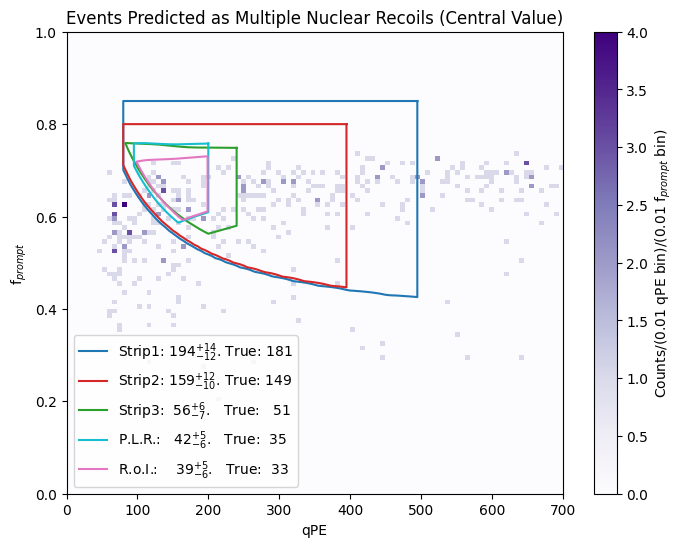

In [87]:
# Extract prediction points to plot
#(these are already multiple recoils)
qpe_mr = prediction_exam['qPE'].to_numpy()
fpr_mr = prediction_exam['fprompt'].to_numpy()

# Extract the points defining the TCutG
s1_n_points = strip1.GetN()
s1_x_points = strip1.GetX()
s1_y_points = strip1.GetY()

s2_n_points = strip2.GetN()
s2_x_points = strip2.GetX()
s2_y_points = strip2.GetY()

s3_n_points = strip3.GetN()
s3_x_points = strip3.GetX()
s3_y_points = strip3.GetY()

roi_n_points = roi.GetN()
roi_x_points = roi.GetX()
roi_y_points = roi.GetY()

roi_plr_n_points = roi_plr.GetN()
roi_plr_x_points = roi_plr.GetX()
roi_plr_y_points = roi_plr.GetY()

# Create a 2D histogram from the TCutG points
n_bins = 100

nbins_x = n_bins  # Number of bins in the X-axis
nbins_y = n_bins  # Number of bins in the Y-axis

x_min, x_max = 0, 700
y_min, y_max = 0, 1

x_bins = np.linspace(x_min, x_max, nbins_x + 1)
y_bins = np.linspace(y_min, y_max, nbins_y + 1)

hist, _, _ = np.histogram2d(qpe_mr, fpr_mr, bins=[x_bins, y_bins])

# Step 4: Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[x_min, x_max, y_min, y_max], aspect='auto', cmap='Purples')

# Optionally, you can add axis labels and a colorbar
plt.xlabel("qPE")
plt.ylabel("f$_{prompt}$")
plt.plot(s1_x_points, s1_y_points, 'tab:blue', label='Strip1: '+str(passed_s1)+'$^{{{}}}_{{{}}}$'.format(sulims1, sdlims1)+'. True: '+str(passed_s1_ans))
plt.plot(s2_x_points, s2_y_points, 'tab:red', label='Strip2: '+str(passed_s2)+'$^{{{}}}_{{{}}}$'.format(sulims2, sdlims2)+'. True: '+str(passed_s2_ans))
plt.plot(s3_x_points, s3_y_points, 'tab:green', label='Strip3:  '+str(passed_s3)+'$^{{{}}}_{{{}}}$'.format(sulims3, sdlims3)+'.   True:   '+str(passed_s3_ans))
plt.plot(roi_plr_x_points, roi_plr_y_points, 'tab:cyan', label='P.L.R.:   '+str(passed_roi_plr)+'$^{{{}}}_{{{}}}$'.format(sulimp, sdlimp)+'.   True:  '+str(passed_roi_plr_ans))
plt.plot(roi_x_points, roi_y_points, 'tab:pink', label='R.o.I.:    '+str(passed_roi)+'$^{{{}}}_{{{}}}$'.format(sulimr, sdlimr)+'.   True:  '+str(passed_roi_ans))
plt.colorbar(label="Counts/("+ str(1/n_bins) + " qPE bin)/("+ str(1/n_bins) + " f$_{prompt}$ bin)")

# Show the plot
plt.title('Events Predicted as Multiple Nuclear Recoils (Central Value)')
plt.legend()
plt.show()

# Close the ROOT files
root_file.Close()
root_file2.Close()
root_file3.Close()